In [16]:
import sys
import numpy as np
from db_tools import connect_db
import pandas as pd

In [3]:
conn = connect_db()
cur = conn.cursor()
table_name = "realestate_rentproperty"
cur.execute("SELECT * FROM "+table_name)
col_name = [description[0] for description in cur.description]
col_name

['property_id',
 'date',
 'rent',
 'kanrihi',
 'sikikin',
 'reikin',
 'subtitle',
 'location',
 'latitude',
 'longititude',
 'close_station',
 'floor_plan',
 'area',
 'age',
 'floor',
 'orientation',
 'bath_toilet',
 'auto_lock',
 'url',
 'predicted_rent',
 'rent_diff']

In [19]:
conn = connect_db()
cur = conn.cursor()
cur.execute("SELECT rent, latitude, longititude, floor_plan FROM "+table_name)
rows = cur.fetchall()
rows = np.array(rows)
rows_df = pd.DataFrame(rows, columns=['rent', 'latitude', 'longititude', 'floor_plan'])

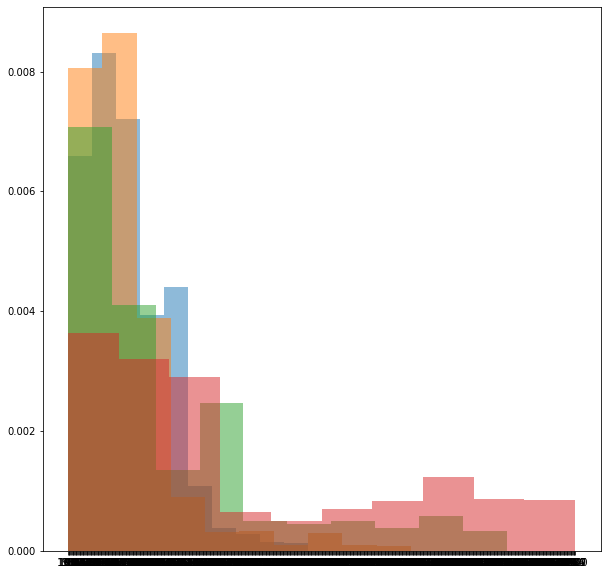

In [26]:
import matplotlib.pyplot as plt

rent_oner = rows_df[rows_df['floor_plan']=='ワンルーム']['rent'].values
rent_onek = rows_df[rows_df['floor_plan']=='1K']['rent'].values
rent_oneldk = rows_df[rows_df['floor_plan']=='1LDK']['rent'].values
rent_twoldk = rows_df[rows_df['floor_plan']=='2LDK']['rent'].values


plt.figure(figsize=(10, 10))
plt.hist(rent_oner, alpha=0.5, density=True)
plt.hist(rent_onek, alpha=0.5, density=True)
plt.hist(rent_oneldk, alpha=0.5, density=True)
plt.hist(rent_twoldk, alpha=0.5, density=True)
plt.show()

In [43]:
import itertools

latitude_list = np.unique(rows_df['latitude']).tolist()
longititude_list = np.unique(rows_df['longititude']).tolist()

lati_longi = []
for lati in latitude_list:
    for longi in longititude_list:
        try:
            rent = rows_df['rent'][rows_df['latitude']==lati][rows_df['longititude']==longi].values
            SQL = 'SELECT AVG(rent) FROM realestate_rentproperty WHERE latitude=='+latitude+" AND langititude =" + langititude
            conn = connect_db()
            cur = conn.cursor()  
            cur.execute(SQL)
            rent = cur.fetchall()
            print(rent)
            lati_longi.append((lati, longi, rent))
        except Exception as e:
            print(rent)

['8.3' '22.0' '21.1' '27.0' '21.5' '10.2' '13.2' '8.3' '10.1' '10.5' '6.8'
 '18.3' '18.3' '21.1' '15.0' '14.8' '15.0' '15.0' '9.3' '14.9' '10.1'
 '10.2' '10.5' '9.9' '10.3' '10.3' '8.4' '7.8' '9.9' '11.0' '8.9' '7.9'
 '8.12' '10.9' '8.9' '6.8' '5.1' '22.0' '16.8' '14.5' '14.8' '13.2' '7.8'
 '16.5' '22.5' '16.9' '15.5' '12.0' '22.8' '18.8' '16.4' '13.0' '9.0'
 '7.9' '10.1' '9.5' '8.9' '10.9' '8.8' '5.1' '10.1']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

KeyboardInterrupt: 